In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import LSTM, Dropout
from keras import layers
from keras import activations
from sklearn.preprocessing import StandardScaler
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
pd.options.display.max_rows = 6000


In [2]:
X = pd.read_csv('data_with_weather_wo_outliers.csv')
X = X.set_index('Date')
X.index = pd.to_datetime(X.index)

In [3]:
X_train, X_test  = train_test_split(X, test_size=0.2, shuffle=False)

y_train = X_train['total_demand'].to_numpy().reshape(-1, 1)
y_test = X_test['total_demand'].to_numpy().reshape(-1, 1)

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train).flatten().tolist()
y_test = scaler.transform(y_test).flatten().tolist()

In [4]:
# Sequence Data Preparation
SEQUENCE_SIZE = 1440

def to_sequences(seq_size, obs, after_window_length):
    x = []
    y = []
    for i in range(len(obs) - seq_size - after_window_length + 1):
        window = obs[i:(i + seq_size)]
        after_window = obs[i + seq_size: i + seq_size + after_window_length]
        x.append(window)
        y.append(after_window)
    return x, y

x_train, y_train = to_sequences(SEQUENCE_SIZE, y_train, 60)
x_test, y_test = to_sequences(SEQUENCE_SIZE, y_test, 60)

In [ ]:
X_train = np.array(x_train)
X_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=128, activation=None, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(LSTM(units=128, activation=None, return_sequences=True))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(LSTM(units=128, activation=None))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(Dense(60))
optimizer = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['mape', 'mse', 'mae'])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,393 (1.26 MB)

 Trainable params: 330,625 (1.26 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/100
633/633 ━━━━━━━━━━━━━━━━━━━━ 593s 888ms/step - loss: 0.0385 - mae: 0.0760 - mape: 60.7166 - mse: 0.0385 - val_loss: 0.0423 - val_mae: 0.1776 - val_mape: 37.9435 - val_mse: 0.0423
Epoch 2/100
633/633 ━━━━━━━━━━━━━━━━━━━━ 568s 897ms/step - loss: 0.0019 - mae: 0.0321 - mape: 21.7411 - mse: 0.0019 - val_loss: 0.0045 - val_mae: 0.0443 - val_mape: 31.4043 - val_mse: 0.0045
Epoch 3/100
633/633 ━━━━━━━━━━━━━━━━━━━━ 654s 1s/step - loss: 0.0015 - mae: 0.0291 - mape: 22.4139 - mse: 0.0015 - val_loss: 0.0033 - val_mae: 0.0519 - val_mape: 28.3657 - val_mse: 0.0033
Epoch 4/100
633/633 ━━━━━━━━━━━━━━━━━━━━ 610s 963ms/step - loss: 0.0011 - mae: 0.0243 - mape: 17.8722 - mse: 0.0011 - val_loss: 0.0055 - val_mae: 0.0581 - val_mape: 16.5056 - val_mse: 0.0055
Epoch 5/100
633/633 ━━━━━━━━━━━━━━━━━━━━ 570s 901ms/step - loss: 0.0014 - mae: 0.0272 - mape: 16.5825 - mse: 0.0014 - val_loss: 0.0013 - val_mae: 0.0291 - val_mape: 14.2546 - val_mse: 0.0013
Epoch 6/100
633/633 ━━━━━━━━━━━━━━━━━━━━ 515s 81

In [41]:
# Reshape y_pred to a 2D array before transforming
trainPredict = np.array(trainPredict).reshape(-1, 1)

# Inverse transform y_pred to get the original values
y_pred_original = scaler.inverse_transform(trainPredict).flatten().tolist()


In [42]:
y_train_original = scaler.inverse_transform(np.array(y_train).reshape(-1, 1)).flatten().tolist()

In [44]:
np.array(abs(np.array(y_train_original)-np.array(y_pred_original))).mean()

1.3841529775358472

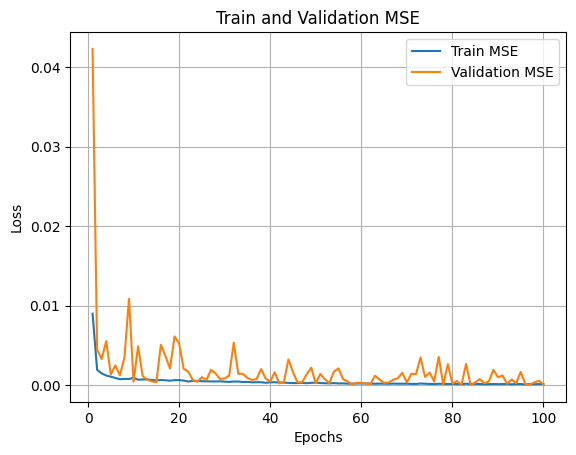

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train MSE')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation MSE')
plt.legend()
plt.grid()
plt.show()

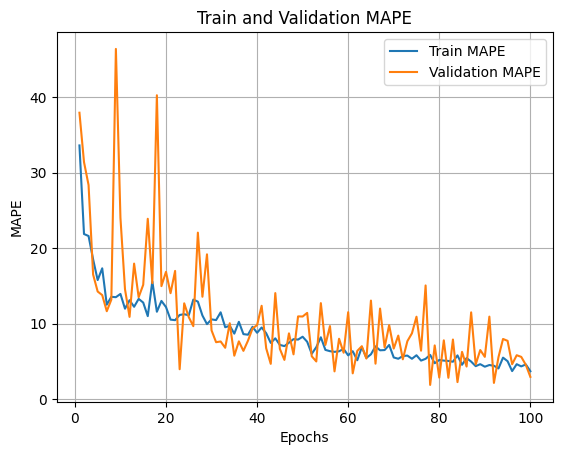

In [14]:
train_loss = history.history['mape']
val_loss = history.history['val_mape']
plt.figure()
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train MAPE')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Train and Validation MAPE')
plt.legend()
plt.grid()
plt.show()

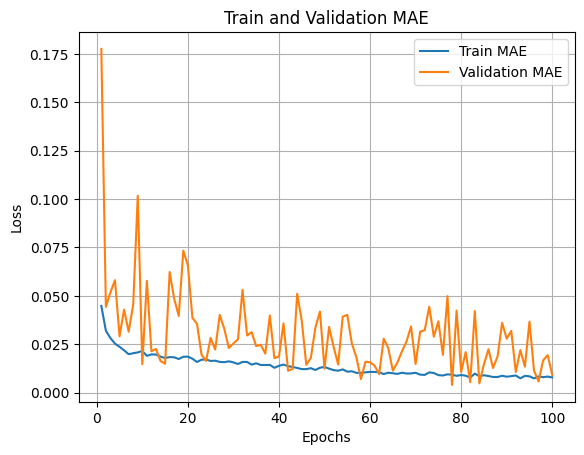

In [16]:
train_loss = history.history['mae']
val_loss = history.history['val_mae']
plt.figure()
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train MAE')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation MAE')
plt.legend()
plt.grid()
plt.show()

In [31]:
trainPredict = model.predict(X_train).reshape(y_train.shape)
testPredict = model.predict(X_test).reshape(y_test.shape)

19764/19764 ━━━━━━━━━━━━━━━━━━━━ 328s 17ms/step
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 95s 19ms/step


In [32]:
training_mae = mean_absolute_error(y_train, trainPredict)
test_mae = mean_absolute_error(y_test, testPredict)
print("Training MAE:", round(training_mae, 6))
print("Test MAE:", round(test_mae, 6))

Training MAE: 0.008497
Test MAE: 0.009246


In [33]:
training_mape = mean_absolute_percentage_error(y_train, trainPredict)
test_mape = mean_absolute_percentage_error(y_test, testPredict)
print(f"\n\nTraining MAPE: {round(training_mape, 4)*100} %")
print(f"Test MAPE: {round(test_mape, 4) *100} %")



Training MAPE: 3.6799999999999997 %
Test MAPE: 2.9499999999999997 %


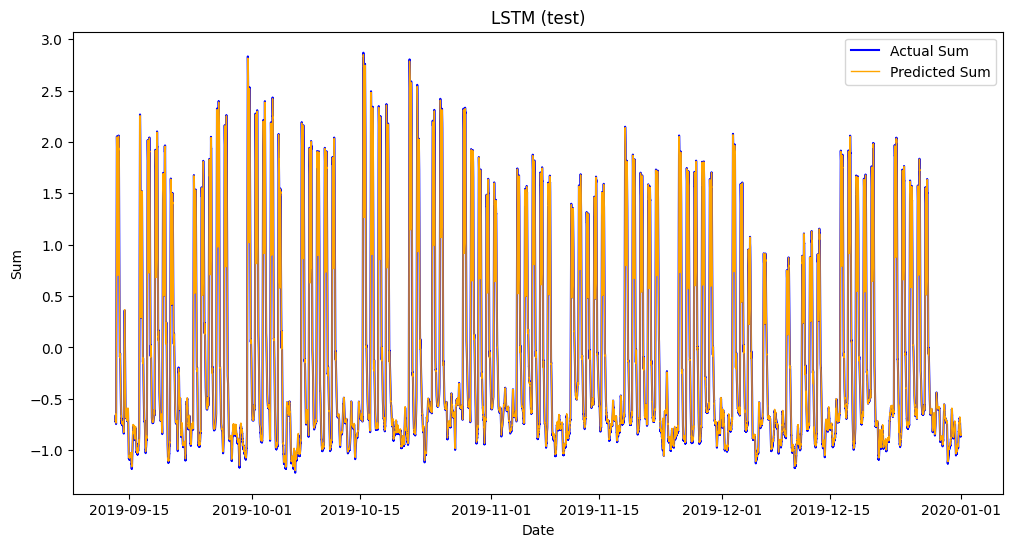

In [20]:
cutoff = int(len(X) * 0.8)+10
plt.figure(figsize=(12, 6))
plt.plot(X[cutoff:].index, y_test, color='blue', label='Actual Sum')
plt.plot(X[cutoff:].index, testPredict, color='orange', linewidth=1, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('LSTM (test)')
plt.legend()
plt.show()

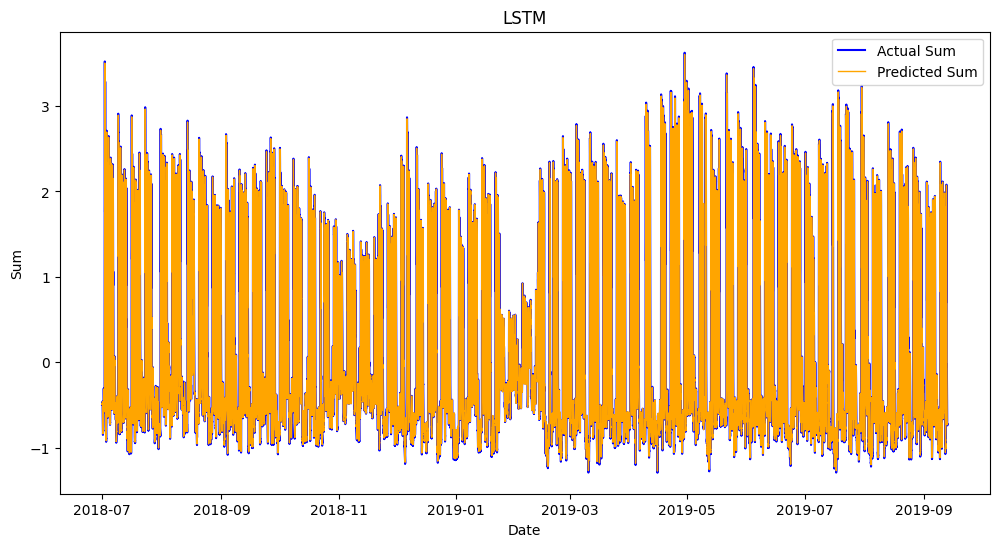

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(X[:cutoff-20].index, y_train, color='blue', label='Actual Sum')
plt.plot(X[:cutoff-20].index, trainPredict, color='orange', linewidth=1, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('LSTM')
plt.legend()
plt.show()

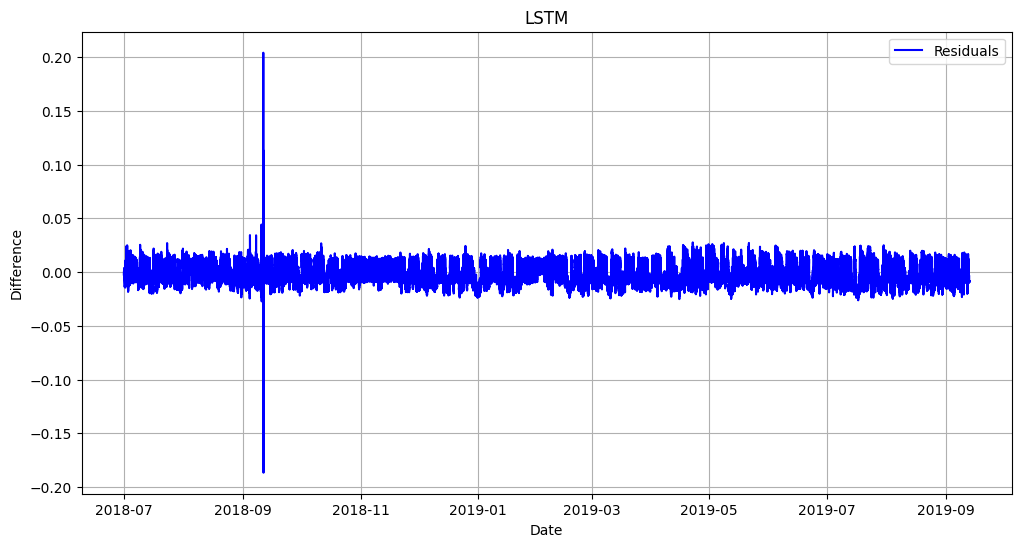

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(X[:cutoff-20].index, y_train-trainPredict, color='blue', label='Residuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('LSTM')
plt.legend()
plt.grid()
plt.show()

In [24]:
np.save('lstm.npy', history.history)

In [29]:
np.save('lstm_residuals_train.npy', y_train-trainPredict)
np.save('lstm_residuals_test.npy', y_test-testPredict)

In [30]:
model.save('lstm.keras')